### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:

import gdown

# Enlace corregido con el ID del archivo
url = 'https://drive.google.com/uc?id=1S594-FNI-ROTXLYv46KcjsmvjkvzOSLk'

# Descargar el archivo CSV
output = 'archivo.csv'
gdown.download(url, output, quiet=False)

# Cargar el CSV a un DataFrame con pandas
df = pd.read_csv(output)
df


Downloading...
From (original): https://drive.google.com/uc?id=1S594-FNI-ROTXLYv46KcjsmvjkvzOSLk
From (redirected): https://drive.google.com/uc?id=1S594-FNI-ROTXLYv46KcjsmvjkvzOSLk&confirm=t&uuid=2d417ebd-ddc2-4e50-97a3-b38333b87a05
To: /Users/cristiramirez/Documents/IRONHACK/GitHub/Mini-project SQL/lab-eda-univariate/archivo.csv
100%|██████████| 481M/481M [00:08<00:00, 59.0MB/s] 


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [14]:
fr_table_cat = df.category.value_counts().head(5)
fr_table_cat_norm = df.category.value_counts(normalize=True).head(5)
fr_table_cat_norm

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

The top 5 most listed product categories are **Sports & Outdoors, Beauty, Handmade clothing, Shoes & Accesories, Bath & Body and Birthday Gifts**

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: xlabel='category'>

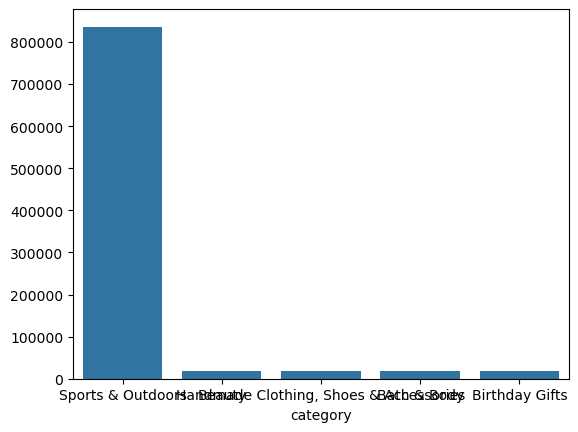

In [15]:
graph = sns.barplot(x=fr_table_cat_norm.index, y=fr_table_cat.values)
graph

<Axes: ylabel='count'>

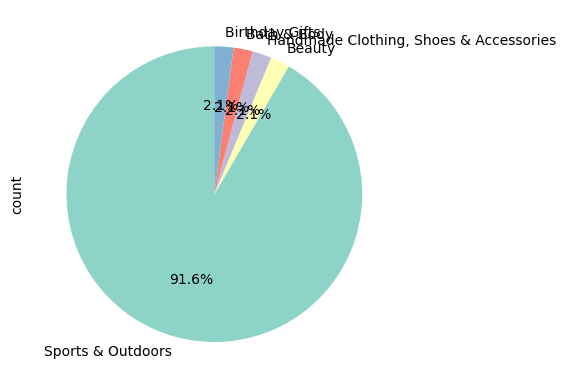

In [21]:
gr = fr_table_cat.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
gr

**Sports** dominate the `category`column 

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [22]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [27]:
price_mean = df.price.mean()
price_mode = df.price.mode()
price_median = df.price.median()

price_mean, price_mode, price_median


(89.24380943923663,
 0    9.99
 Name: price, dtype: float64,
 19.09)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [29]:
std_price = df.price.std()
var_price = df.price.var()
min_price = df.price.min()
max_price = df.price.max()
range_price = max_price - min_price
quantilie_price = df.price.quantile([0.25, 0.5, 0.75])

std_price, var_price, min_price, max_price, range_price, quantilie_price

(345.6088617535223,
 119445.4853225653,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [ ]:
price = df['price']

g2 = sns.histplot(data=price, kde=True)
g2

<Axes: ylabel='price'>

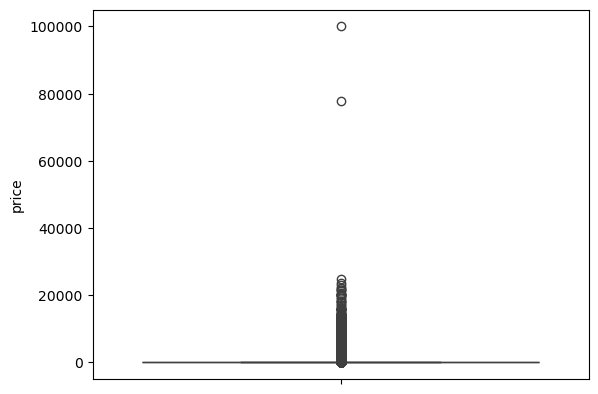

In [34]:
g3 = sns.boxplot(data=price)
g3

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [36]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [38]:
stars_mean = df.stars.mean()
stars_mode = df.stars.mode()
stars_median = df.stars.median()

stars_mean, stars_mode, stars_median

(2.152836472966065,
 0    0.0
 Name: stars, dtype: float64,
 0.0)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [39]:
std_stars = df.stars.std()
var_stars = df.stars.var()
min_stars = df.stars.min()
max_stars = df.stars.max()
range_stars = max_stars - min_stars
quantilie_stars = df.stars.quantile([0.25, 0.5, 0.75])

std_stars, var_stars, min_stars, max_stars, range_stars, quantilie_stars

(2.1948653785054697,
 4.81743402976196,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [40]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

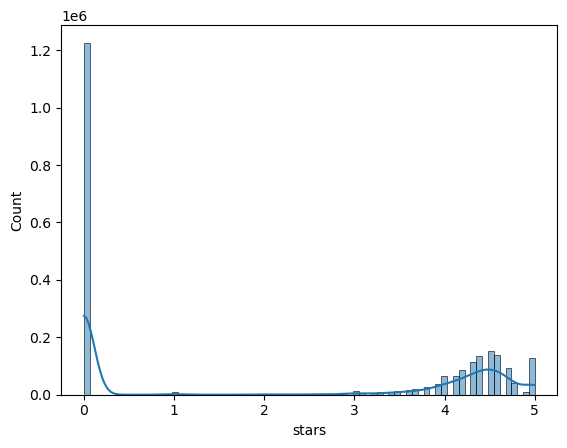

In [41]:
stars = df['stars']

g4 = sns.histplot(data=stars, kde=True)
g4